<a href="https://colab.research.google.com/github/faiyazabdullah/ML-Research/blob/main/Spam_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import VotingClassifier

# **Data Preprocessing**

In [ ]:
# Load the dataset
data = pd.read_csv("/content/spam.csv", encoding='latin-1')

# Select relevant columns
data = data[['v1', 'v2']]
# Rename columns for clarity
data.columns = ['label', 'text']

# Convert labels to binary (0 for ham, 1 for spam)
data['label'] = data['label'].apply(lambda x: 1 if x.lower() == 'spam' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Tokenization and feature extraction using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')  # Remove common English words
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Now, X_train_counts and X_test_counts contain the tokenized and transformed data
# These matrices can be used as input for machine learning algorithms

<ipython-input-3-e73d1349073d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].apply(lambda x: 1 if x.lower() == 'spam' else 0)


# **Data Presentation**

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
None

Class Distribution:
0    4825
1     747
Name: label, dtype: int64


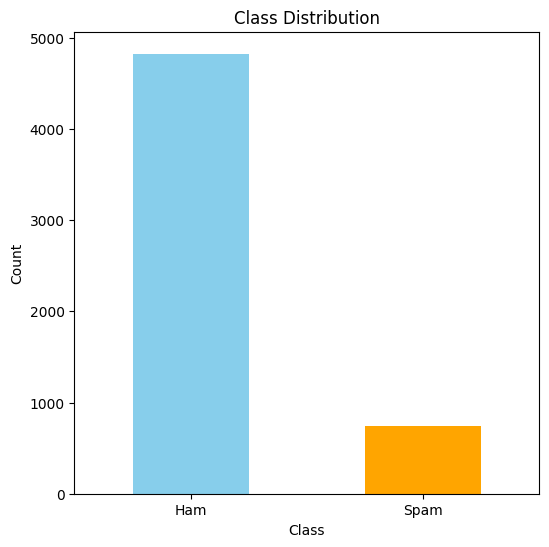


Sample Text Messages:
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object


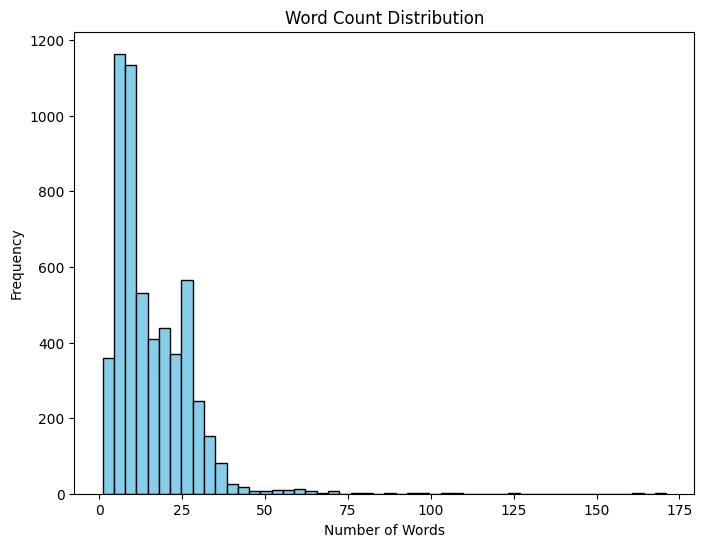

In [ ]:
# Explore the dataset
print("Dataset Info:")
print(data.info())

# Check class distribution
label_counts = data['label'].value_counts()
print("\nClass Distribution:")
print(label_counts)

# Visualize class distribution
plt.figure(figsize=(6, 6))
label_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ['Ham', 'Spam'], rotation=0)
plt.show()

# Sample text messages
print("\nSample Text Messages:")
print(data['text'].head())

# Word count distribution
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8, 6))
plt.hist(data['word_count'], bins=50, color='skyblue', edgecolor='black')
plt.title("Word Count Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# **Train Naive Bayes Classifier for Raw Data**

In [ ]:
# Train Naive Bayes classifier on the sparse features
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_counts, y_train)

# Predict using Naive Bayes for training and test data
naive_bayes_train_predictions = naive_bayes_classifier.predict(X_train_counts)
naive_bayes_test_predictions = naive_bayes_classifier.predict(X_test_counts)

# Calculate accuracy for Naive Bayes
accuracy_nb_train = accuracy_score(y_train, naive_bayes_train_predictions)
accuracy_nb_test = accuracy_score(y_test, naive_bayes_test_predictions)

print("Naive Bayes Training Accuracy:", accuracy_nb_train)
print("Naive Bayes Test Accuracy:", accuracy_nb_test)

Naive Bayes Training Accuracy: 0.9946152120260264
Naive Bayes Test Accuracy: 0.9838565022421525


# **Train Decision Tree Classifier for Raw Data**

In [ ]:
# Run Decision Tree Classifier on the enriched dataset
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train_counts, y_train)

# Predict using Decision Tree for the enriched dataset
decision_tree_train_predictions = decision_tree_classifier.predict(X_train_counts)
decision_tree_test_predictions = decision_tree_classifier.predict(X_test_counts)

# Calculate accuracy for Decision Tree on the enriched dataset
accuracy_decision_tree_train = accuracy_score(y_train, decision_tree_train_predictions)
accuracy_decision_tree_test = accuracy_score(y_test, decision_tree_test_predictions)

print("Decision Tree Training Accuracy:", accuracy_decision_tree_train)
print("Decision Tree Test Accuracy:", accuracy_decision_tree_test)

Decision Tree Training Accuracy: 1.0
Decision Tree Test Accuracy: 0.9713004484304932


# **Train Random Forest Classifier for Raw Data**

In [ ]:
# Train Random Forest on the enriched dataset
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train_counts, y_train)

# Predict using the Random Forest model
random_forest_train_predictions = random_forest_classifier.predict(X_train_counts)
random_forest_test_predictions = random_forest_classifier.predict(X_test_counts)

# Calculate accuracy for Random Forest
accuracy_rf_train = accuracy_score(y_train, random_forest_train_predictions)
accuracy_rf_test = accuracy_score(y_test, random_forest_test_predictions)

print("Random Forest Training Accuracy:", accuracy_rf_train)
print("Random Forest Test Accuracy:", accuracy_rf_test)

Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.9766816143497757


# **Train Ensemble Classifier for Raw Data**

In [ ]:
# Combine predictions using weighted averaging for not enriched dataset
weight_naive_bayes = 0.3
weight_random_forest = 0.7

# Predict probabilities using Naive Bayes for training and test data
naive_bayes_train_probabilities = naive_bayes_classifier.predict_proba(X_train_counts)
naive_bayes_test_probabilities = naive_bayes_classifier.predict_proba(X_test_counts)

# Extract probabilities for the positive class (spam)
naive_bayes_train_spam_prob = naive_bayes_train_probabilities[:, 1]
naive_bayes_test_spam_prob = naive_bayes_test_probabilities[:, 1]

# Predict probabilities using Random Forest for training and test data
random_forest_train_probabilities = random_forest_classifier.predict_proba(X_train_counts)
random_forest_test_probabilities = random_forest_classifier.predict_proba(X_test_counts)

# Extract probabilities for the positive class (spam)
random_forest_train_spam_prob = random_forest_train_probabilities[:, 1]
random_forest_test_spam_prob = random_forest_test_probabilities[:, 1]

# Ensemble predictions for training data
ensemble_train_spam_prob = (weight_naive_bayes * naive_bayes_train_spam_prob + weight_random_forest * random_forest_train_spam_prob)

# Ensemble predictions for test data
ensemble_test_spam_prob = (weight_naive_bayes * naive_bayes_test_spam_prob + weight_random_forest * random_forest_test_spam_prob)

# Threshold probabilities to get binary predictions (0 or 1)
threshold = 0.5
ensemble_train_predictions = (ensemble_train_spam_prob > threshold).astype(int)
ensemble_test_predictions = (ensemble_test_spam_prob > threshold).astype(int)

# Calculate accuracy for the ensemble model
accuracy_ensemble_train = accuracy_score(y_train, ensemble_train_predictions)
accuracy_ensemble_test = accuracy_score(y_test, ensemble_test_predictions)

print("Ensemble Training Accuracy:", accuracy_ensemble_train)
print("Ensemble Test Accuracy:", accuracy_ensemble_test)

Ensemble Training Accuracy: 0.9982050706753421
Ensemble Test Accuracy: 0.9856502242152466


# **Extract Naive Bayes Probabilities and Integrate with Features**

In [ ]:
# Get class probabilities predicted by Naive Bayes
naive_bayes_probabilities = naive_bayes_classifier.predict_proba(X_train_counts)

# Add Naive Bayes probabilities as new features to the original dataset
X_train_enriched = np.hstack((X_train_counts.toarray(), naive_bayes_probabilities))

# Transform test data and add Naive Bayes probabilities as features
X_test_enriched = np.hstack((X_test_counts.toarray(), naive_bayes_classifier.predict_proba(X_test_counts)))

# **Naive Bayes Classifier on the enriched dataset**

In [ ]:
# Run Naive Bayes Classifier on the enriched dataset
naive_bayes_enriched = MultinomialNB()
naive_bayes_enriched.fit(X_train_enriched, y_train)

# Predict using Naive Bayes for the enriched dataset
naive_bayes_train_predictions_enriched = naive_bayes_enriched.predict(X_train_enriched)
naive_bayes_test_predictions_enriched = naive_bayes_enriched.predict(X_test_enriched)

# Calculate accuracy for Naive Bayes on the enriched dataset
accuracy_nb_train_enriched = accuracy_score(y_train, naive_bayes_train_predictions_enriched)
accuracy_nb_test_enriched = accuracy_score(y_test, naive_bayes_test_predictions_enriched)

print("Naive Bayes Training Accuracy (Enriched Dataset):", accuracy_nb_train_enriched)
print("Naive Bayes Test Accuracy (Enriched Dataset):", accuracy_nb_test_enriched)

Naive Bayes Training Accuracy (Enriched Dataset): 0.9957370428539376
Naive Bayes Test Accuracy (Enriched Dataset): 0.9856502242152466


# **Decision Tree Classifier on the enriched dataset**

In [ ]:
# Run Decision Tree Classifier on the enriched dataset
decision_tree_classifier_enriched = DecisionTreeClassifier(random_state=42)
decision_tree_classifier_enriched.fit(X_train_enriched, y_train)

# Predict using Decision Tree for the enriched dataset
decision_tree_train_predictions_enriched = decision_tree_classifier_enriched.predict(X_train_enriched)
decision_tree_test_predictions_enriched = decision_tree_classifier_enriched.predict(X_test_enriched)

# Calculate accuracy for Decision Tree on the enriched dataset
accuracy_decision_tree_train_enriched = accuracy_score(y_train, decision_tree_train_predictions_enriched)
accuracy_decision_tree_test_enriched = accuracy_score(y_test, decision_tree_test_predictions_enriched)

print("Decision Tree Training Accuracy (Enriched Dataset):", accuracy_decision_tree_train_enriched)
print("Decision Tree Test Accuracy (Enriched Dataset):", accuracy_decision_tree_test_enriched)

Decision Tree Training Accuracy (Enriched Dataset): 1.0
Decision Tree Test Accuracy (Enriched Dataset): 0.9847533632286996


# **Train Random Forest Classifier on Enriched Data**

In [ ]:
# Train Random Forest on the enriched dataset
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train_enriched, y_train)

# Predict using the Random Forest model
random_forest_train_predictions = random_forest_classifier.predict(X_train_enriched)
random_forest_test_predictions = random_forest_classifier.predict(X_test_enriched)

# Calculate accuracy for Random Forest
accuracy_rf_train = accuracy_score(y_train, random_forest_train_predictions)
accuracy_rf_test = accuracy_score(y_test, random_forest_test_predictions)

print("Random Forest Training Accuracy:", accuracy_rf_train)
print("Random Forest Test Accuracy:", accuracy_rf_test)

Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.9865470852017937


# **Ensemble the Models and Make Predictions**

In [ ]:
# Predict probabilities using Naive Bayes for training and test data
naive_bayes_train_probabilities = naive_bayes_classifier.predict_proba(X_train_counts)
naive_bayes_test_probabilities = naive_bayes_classifier.predict_proba(X_test_counts)

# Extract probabilities for the positive class (spam)
naive_bayes_train_spam_prob = naive_bayes_train_probabilities[:, 1]
naive_bayes_test_spam_prob = naive_bayes_test_probabilities[:, 1]

# Predict probabilities using Random Forest for training and test data
random_forest_train_probabilities = random_forest_classifier.predict_proba(X_train_enriched)
random_forest_test_probabilities = random_forest_classifier.predict_proba(X_test_enriched)

# Extract probabilities for the positive class (spam)
random_forest_train_spam_prob = random_forest_train_probabilities[:, 1]
random_forest_test_spam_prob = random_forest_test_probabilities[:, 1]

# Combine predictions using weighted averaging
weight_naive_bayes = 0.3
weight_random_forest = 0.7

# Ensemble predictions for training data
ensemble_train_spam_prob = (weight_naive_bayes * naive_bayes_train_spam_prob + weight_random_forest * random_forest_train_spam_prob)

# Ensemble predictions for test data
ensemble_test_spam_prob = (weight_naive_bayes * naive_bayes_test_spam_prob + weight_random_forest * random_forest_test_spam_prob)

# Threshold probabilities to get binary predictions (0 or 1)
threshold = 0.5
ensemble_train_predictions = (ensemble_train_spam_prob > threshold).astype(int)
ensemble_test_predictions = (ensemble_test_spam_prob > threshold).astype(int)

# Calculate accuracy for the ensemble model
accuracy_ensemble_train = accuracy_score(y_train, ensemble_train_predictions)
accuracy_ensemble_test = accuracy_score(y_test, ensemble_test_predictions)

print("Ensemble Training Accuracy:", accuracy_ensemble_train)
print("Ensemble Test Accuracy:", accuracy_ensemble_test)

Ensemble Training Accuracy: 0.99798070450976
Ensemble Test Accuracy: 0.9874439461883409


# **Confusion Matrix**
Summarizes the performance of a machine learning model on a set of test data.

Confusion Matrix for Naive Bayes Classifier:


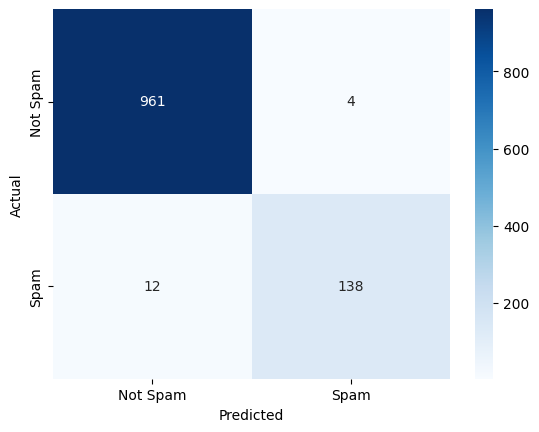

Confusion Matrix for Decision Tree Classifier:


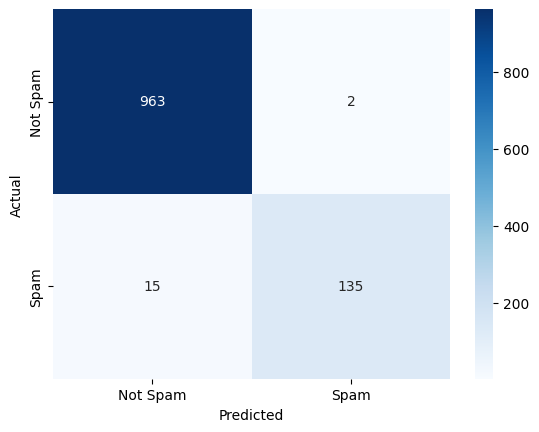

Confusion Matrix for Random Forest Classifier:


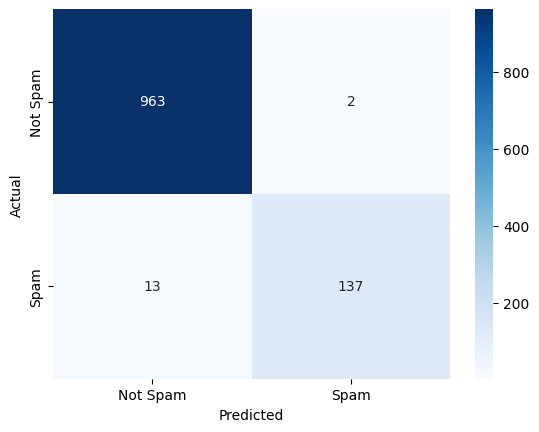

Confusion Matrix for Ensemble Learning Classifier:


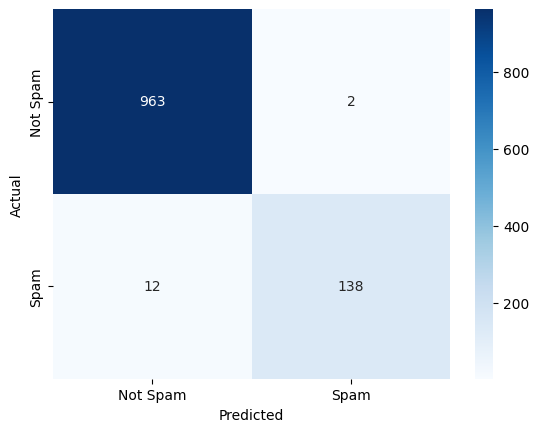

In [ ]:
# Function to plot a confusion matrix heatmap
def plot_confusion_matrix_heatmap(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.axes()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    plt.show()

# Usage example for Naive Bayes Classifier
print("Confusion Matrix for Naive Bayes Classifier:")
plot_confusion_matrix_heatmap(y_test, naive_bayes_test_predictions_enriched, labels=["Not Spam", "Spam"])

# Usage example for Decision Tree Classifier
print("Confusion Matrix for Decision Tree Classifier:")
plot_confusion_matrix_heatmap(y_test, decision_tree_test_predictions_enriched, labels=["Not Spam", "Spam"])

# Usage example for Random Forest Classifier
print("Confusion Matrix for Random Forest Classifier:")
plot_confusion_matrix_heatmap(y_test, random_forest_test_predictions, labels=["Not Spam", "Spam"])

# Usage example for Ensemble Learning Classifier
print("Confusion Matrix for Ensemble Learning Classifier:")
plot_confusion_matrix_heatmap(y_test, ensemble_test_predictions, labels=["Not Spam", "Spam"])

# **Classification Report**
Summary of different evaluation metrics like precision, recall, F1-score, and support for each class.

In [ ]:
print("Classification Report (Naive Bayes Classifier):")
print(classification_report(y_test, naive_bayes_test_predictions_enriched))

print("Classification Report (Decision Tree Classifier):")
print(classification_report(y_test, decision_tree_test_predictions_enriched))

print("Classification Report (Random Forest Classifier):")
print(classification_report(y_test, random_forest_test_predictions))

print("Classification Report (Ensemble Learning Classifier):")
print(classification_report(y_test, ensemble_test_predictions))

Classification Report (Naive Bayes Classifier):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       965
           1       0.97      0.92      0.95       150

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

Classification Report (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.90      0.94       150

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115

Classification Report (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       965
           1       0.99      0.91      0.95       150

    accuracy                      

# **10-fold cross validation**

In [ ]:
# Concatenate original features and Naive Bayes probabilities
X_enriched = np.hstack((X_train_counts.toarray(), naive_bayes_probabilities))

# Create Naive Bayes and Random Forest classifiers
naive_bayes_classifier = MultinomialNB()
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit classifiers on original sparse features
naive_bayes_classifier.fit(X_train_counts, y_train)
random_forest_classifier.fit(X_train_counts, y_train)

# Get class probabilities predicted by Naive Bayes
naive_bayes_probabilities = naive_bayes_classifier.predict_proba(X_train_counts)

# Extract probabilities for the positive class (spam)
naive_bayes_train_spam_prob = naive_bayes_probabilities[:, 1]
random_forest_train_spam_prob = random_forest_classifier.predict_proba(X_train_counts)[:, 1]

# Combine predictions using weighted averaging for not enriched dataset
weight_naive_bayes = 0.3
weight_random_forest = 0.7

# Ensemble predictions for training data
ensemble_train_spam_prob = (weight_naive_bayes * naive_bayes_train_spam_prob +
                            weight_random_forest * random_forest_train_spam_prob)

# Threshold probabilities to get binary predictions (0 or 1)
threshold = 0.5
ensemble_train_predictions = (ensemble_train_spam_prob > threshold).astype(int)

# Create a VotingClassifier with Naive Bayes and Random Forest as estimators
ensemble_classifier = VotingClassifier(estimators=[
    ('naive_bayes', naive_bayes_classifier),
    ('random_forest', random_forest_classifier)],
    voting='soft', weights=[weight_naive_bayes, weight_random_forest])

# Fit the ensemble classifier on the enriched dataset
ensemble_classifier.fit(X_enriched, y_train)

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# Naive Bayes Classifier
nb_cv_scores = cross_val_score(naive_bayes_classifier, X_train_counts, y_train, cv=kf, scoring='accuracy')
print("Naive Bayes Cross-Validation Mean Accuracy:", nb_cv_scores.mean())

# Decision Tree Classifier
dt_cv_scores = cross_val_score(decision_tree_classifier, X_train_counts, y_train, cv=kf, scoring='accuracy')
print("Decision Tree Cross-Validation Mean Accuracy:", dt_cv_scores.mean())

# Random Forest Classifier
rf_cv_scores = cross_val_score(random_forest_classifier, X_train_counts, y_train, cv=kf, scoring='accuracy')
print("Random Forest Cross-Validation Mean Accuracy:", rf_cv_scores.mean())

# Ensemble Classifier
ensemble_cv_scores = cross_val_score(ensemble_classifier, X_enriched, y_train, cv=kf, scoring='accuracy')
print("Ensemble Cross-Validation Mean Accuracy:", ensemble_cv_scores.mean())

Naive Bayes Cross-Validation Mean Accuracy: 0.9798070237315463
Decision Tree Cross-Validation Mean Accuracy: 0.9690361263667053
Random Forest Cross-Validation Mean Accuracy: 0.9759898221393662
Ensemble Cross-Validation Mean Accuracy: 0.9946158109537965
